#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer


class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


# dataset path
path = '/content/drive/MyDrive/Colab Notebooks/news/Bangla-News-Headlines-Categorization-master/'
stopwords_list = path+'bangla_stopwords.txt'

Total number of headlines: 136811


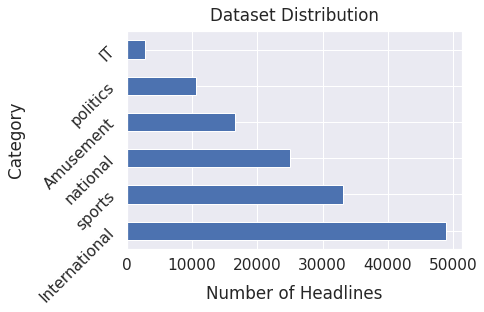

In [ ]:
data = pd.read_csv(path+'headlines.csv',encoding='utf-8')
print(f'Total number of headlines: {len(data)}')
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Headlines", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
data.columns

Index(['headline', 'category', 'newspaper name'], dtype='object')

In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
      print(data.headline[i],'\n','Sentiment:-- ',data.category[i],'\n')  

মোদির পাশে তৈমুর! 
 Sentiment:--  Amusement 

দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
 Sentiment:--  Amusement 

সেই রানু মণ্ডলের নকল ছবি নেটদুনিয়ায় ভাইরাল 
 Sentiment:--  Amusement 

ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
 Sentiment:--  Amusement 

কলকাতার ছবিতেও নিয়মিত অভিনয় করার ইচ্ছা আছে: অপু বিশ্বাস 
 Sentiment:--  Amusement 

র‍্যাম্পে হাঁটলেন সেই রানু মণ্ডল! 
 Sentiment:--  Amusement 

প্রযুক্তির কল্যাণে আধুনিক জীবনে নতুন মাত্রা 
 Sentiment:--  IT 

ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
 Sentiment:--  IT 

মহাকাশে বঙ্গবন্ধু স্যাটেলাইট উৎক্ষেপণ সরাসরি দেখবেন যেভাবে 
 Sentiment:--  IT 

একনজরে খালেদা জিয়া 
 Sentiment:--  politics 

চাইলে ফের আলোচনা হতে পারে : ওবায়দুল কাদের 
 Sentiment:--  politics 

ইঞ্জিনিয়ার্স ইন্সটিটিউশনে যাচ্ছেন খালেদা জিয়া 
 Sentiment:--  politics 

‘আমি গুপ্তচর’ 
 Sentiment:--  IT 

তিন সিটিতে একক প্রার্থীর পক্ষে কাজ করার সিদ্ধান্ত 
 Sentiment:--  politics 

চট্টগ্রাম-৮: বিএনপি নেতা মোরশেদ খানের মনোনয়ন বৈধ 
 Sentiment:--  politics 

দুই সিট

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return headlines
# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(cleaning_data)  

# print some cleaned reviews from the dataset
sample_data = [2000,5000,10000,20000,30000,35000,40000,45000,50000,60000,65000,70000,75000,80000,100000]
for i in sample_data:
  print('Original: ',data.headline[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')   

Original:  ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
Cleaned: ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
 Category:--  Amusement 

Original:  ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
Cleaned: ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
 Category:--  IT 

Original:  জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
Cleaned: জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
 Category:--  politics 

Original:  দ. কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
Cleaned: দ  কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
 Category:--  International 

Original:  ফ্লোরিডায় হামলাকারী ‘মানসিকভাবে অসুস্থ’: ট্রাম্প 
Cleaned: ফ্লোরিডায় হামলাকারী  মানসিকভাবে অসুস্থ   ট্রাম্প 
 Category:--  International 

Original:  সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ: মাশরাফি 
Cleaned: সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ  মাশরাফি 
 Category:--  sports 

Original:  সাকিব ফেরালেন শাই হোপকে 
Cleaned: সাকিব ফেরালেন শাই হোপকে 
 Category:--  sports 

Original:  কংগ্রেস সভাপতির পদ থেকে রাহুল গান্ধীর পদত্যাগ 
Cleaned: কংগ্রেস সভা

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 4098 Small Reviews 
Total Reviews: 132713


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)  


Class Name :  International
Number of Documents:47885
Number of Words:307354
Number of Unique Words:28710
Most Frequent Words:

নিহত	3398
না	2133
নিয়ে	1634
ট্রাম্প	1472
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1212
যুক্তরাষ্ট্র	1208
ভারত	1192

Class Name :  sports
Number of Documents:30831
Number of Words:152852
Number of Unique Words:18581
Most Frequent Words:

বাংলাদেশ	1581
না	1122
জয়	883
বাংলাদেশের	873
শুরু	782
নিয়ে	689
সাকিব	672
ভারত	619
শেষ	603
দল	573

Class Name :  national
Number of Documents:24557
Number of Words:158042
Number of Unique Words:20710
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1003
আজ	752
থেকে	617
কাদের	613
খালেদা	566
বিএনপি	557
নিয়ে	556

Class Name :  Amusement
Number of Documents:16067
Number of Words:98582
Number of Unique Words:16622
Most Frequent Words:

নতুন	1158
নিয়ে	1074
ও	1003
গান	683
ভিডিও	517
না	484
নাটক	469
খান	461
চলচ্চিত্র	416
আজ	412

Class Name :  politics
Number of Documents:10577
Number of Words:75657
Number of Unique Words:10398
Mos

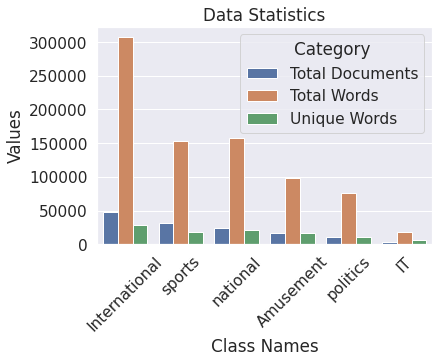

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

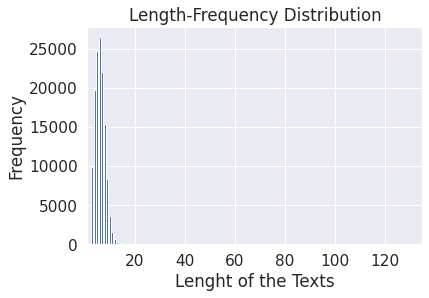

Maximum Length of a review: 21
Minimum Length of a review: 3
Average Length of a reviews: 6.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,category):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
dataset

,headline,category,newspaper name,cleaned,length,ReviewLength
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,7,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor,এত দামি জুতা পরেন প্রিয়াঙ্কা,5,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,5,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,7,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,8,8
...,...,...,...,...,...,...
132708,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,national,Dainik Inqilab,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,6,6
132709,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,7,7
132710,রাজনীতি ছাড়তে চান,national,Dainik Inqilab,রাজনীতি ছাড়তে চান,3,3
132711,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab,বিএনপি নির্বাচনী ভীতিতে ভুগছে,4,4


In [ ]:
# separating the data & label

## Get the Independent Features
X = dataset.drop(columns='category', axis=1)
## Get the Dependent features
Y = dataset['category']

In [ ]:
X

,headline,newspaper name,cleaned,length,ReviewLength
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Jugantor,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,7,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Jugantor,এত দামি জুতা পরেন প্রিয়াঙ্কা,5,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Jugantor,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,5,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Jugantor,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,7,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Jugantor,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,8,8
...,...,...,...,...,...
132708,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,Dainik Inqilab,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,6,6
132709,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,Dainik Inqilab,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,7,7
132710,রাজনীতি ছাড়তে চান,Dainik Inqilab,রাজনীতি ছাড়তে চান,3,3
132711,বিএনপি নির্বাচনী ভীতিতে ভুগছে,Dainik Inqilab,বিএনপি নির্বাচনী ভীতিতে ভুগছে,4,4


In [ ]:
Y

0         Amusement
1         Amusement
2         Amusement
3         Amusement
4         Amusement
            ...    
132708     national
132709     national
132710     national
132711     national
132712     national
Name: category, Length: 132713, dtype: object

In [ ]:
#separating the data and label
X = dataset['cleaned'].values
y = dataset['category'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
dataset

,headline,category,newspaper name,cleaned,length,ReviewLength
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,7,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor,এত দামি জুতা পরেন প্রিয়াঙ্কা,5,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,5,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,7,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,8,8
...,...,...,...,...,...,...
132708,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,national,Dainik Inqilab,প্রধানমন্ত্রীসহ ৩৬টি ফেসবুক অ্যাকাউন্ট খুলেছিল...,6,6
132709,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,7,7
132710,রাজনীতি ছাড়তে চান,national,Dainik Inqilab,রাজনীতি ছাড়তে চান,3,3
132711,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab,বিএনপি নির্বাচনী ভীতিতে ভুগছে,4,4


**Logistic**

In [ ]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6645850993689366


In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix 
import itertools

model.fit(X_train, y_train)
prediction = model.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

               precision    recall  f1-score   support

    Amusement       0.65      0.57      0.61      3214
           IT       0.63      0.24      0.34       559
International       0.66      0.79      0.72      9577
     national       0.56      0.46      0.50      4912
     politics       0.59      0.35      0.44      2115
       sports       0.67      0.74      0.70      6166

     accuracy                           0.64     26543
    macro avg       0.62      0.52      0.55     26543
 weighted avg       0.64      0.64      0.63     26543



**Multinomial Naive Bayes**

In [ ]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import itertools

classifier.fit(X_train, y_train)
prediction1 = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y_test, prediction1)
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

               precision    recall  f1-score   support

    Amusement       0.76      0.43      0.55      3214
           IT       0.73      0.03      0.06       559
International       0.57      0.88      0.69      9577
     national       0.54      0.42      0.47      4912
     politics       0.61      0.16      0.25      2115
       sports       0.70      0.64      0.67      6166

     accuracy                           0.61     26543
    macro avg       0.65      0.43      0.45     26543
 weighted avg       0.63      0.61      0.58     26543



**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
import itertools

rfmodel.fit(X_train, y_train)
prediction2 = rfmodel.predict(X_test)
score = metrics.accuracy_score(y_test, prediction2)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y_test, prediction2)
plot_confusion_matrix(rfmodel, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

               precision    recall  f1-score   support

    Amusement       0.70      0.54      0.61      3214
           IT       0.62      0.21      0.32       559
International       0.65      0.79      0.72      9577
     national       0.59      0.46      0.51      4912
     politics       0.62      0.43      0.51      2115
       sports       0.67      0.75      0.70      6166

     accuracy                           0.65     26543
    macro avg       0.64      0.53      0.56     26543
 weighted avg       0.65      0.65      0.64     26543



**SVM**

In [ ]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn import metrics
import itertools

smodel.fit(X_train, y_train)
prediction3 = smodel.predict(X_test)
score = metrics.accuracy_score(y_test, prediction3)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y_test, prediction3)
plot_confusion_matrix(smodel, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

               precision    recall  f1-score   support

    Amusement       0.70      0.54      0.61      3214
           IT       0.62      0.21      0.32       559
International       0.65      0.79      0.72      9577
     national       0.59      0.46      0.51      4912
     politics       0.62      0.43      0.51      2115
       sports       0.67      0.75      0.70      6166

     accuracy                           0.65     26543
    macro avg       0.64      0.53      0.56     26543
 weighted avg       0.65      0.65      0.64     26543



**---------**